In [1]:
import re
import bisect
import numpy as np 
import pandas as pd
from pyedflib import highlevel
import matplotlib.pyplot as plt

from source.utils import RpeakUltraLong

## Import data

In [2]:
%%time
## Import data complete in 8.3339 seconds by Matlab.
edf_path = '/Users/matthewliu/PranaQ/database/LK/severe/20130809-21666668-1328-CGMHLinKou/A0001328.edf'
signals, signal_headers, header = highlevel.read_edf(edf_path)
ecg = signals[8]
Fs = 200

CPU times: user 7.91 s, sys: 949 ms, total: 8.86 s
Wall time: 9.44 s


## R peak detecion via ECG

In [3]:
%%time
## Peak detection completed in 2.46 seconds by Matlab.
R = RpeakUltraLong(ecg, Fs)

Peak detection completed!
CPU times: user 8.34 s, sys: 886 ms, total: 9.22 s
Wall time: 7.98 s


## Visualization

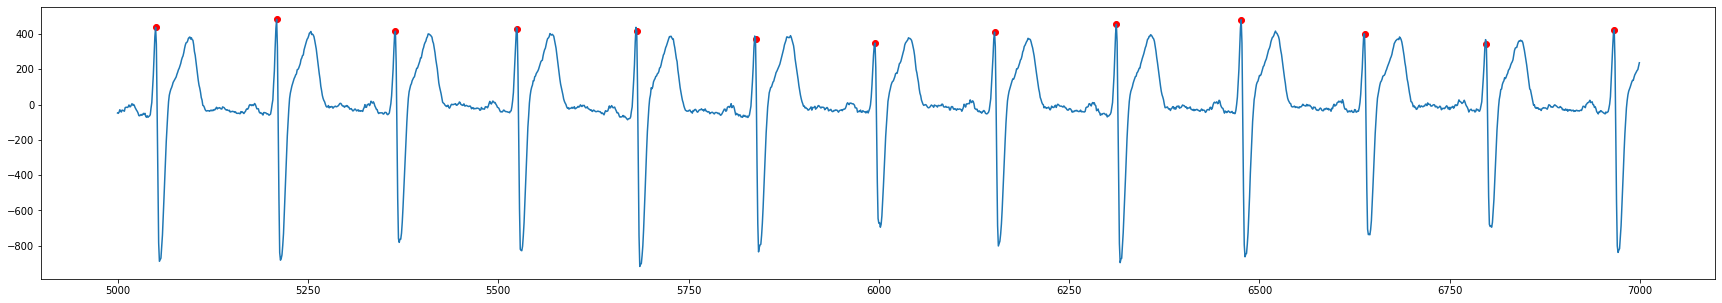

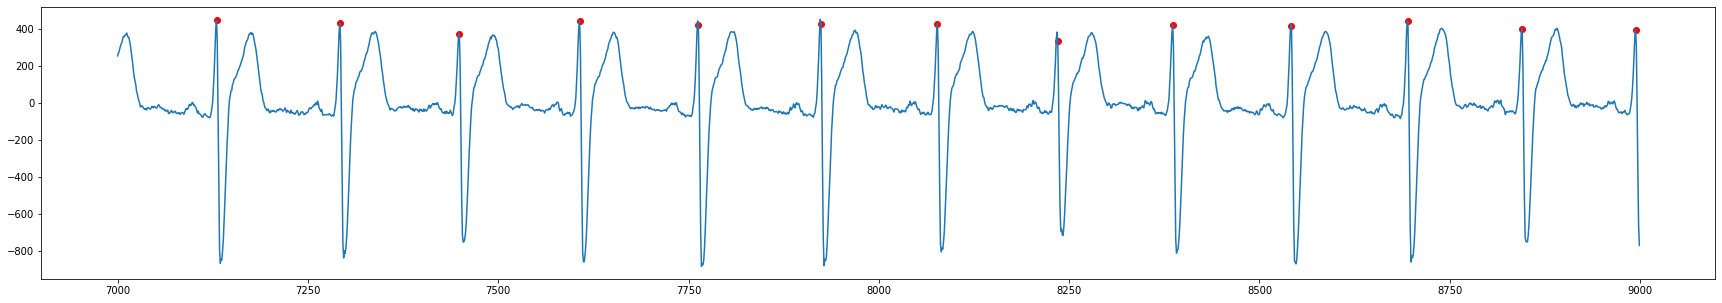

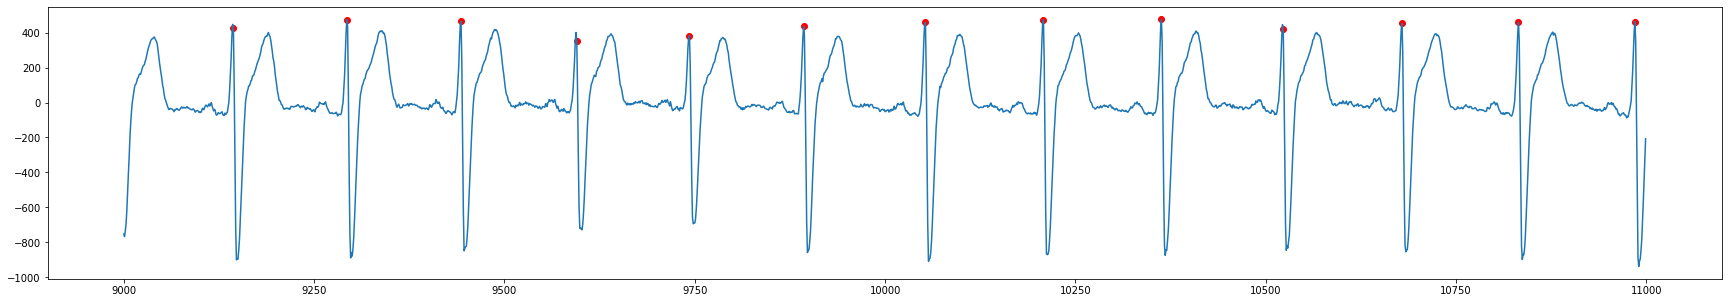

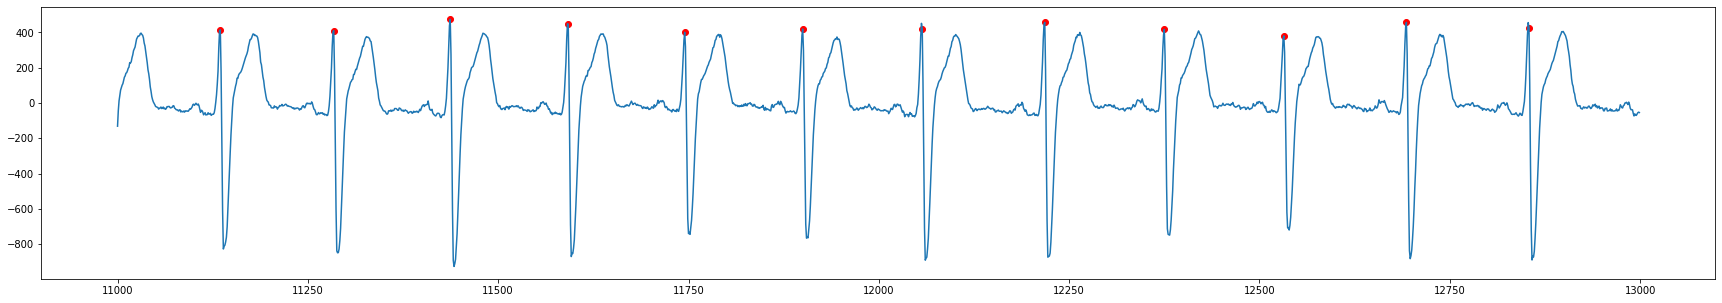

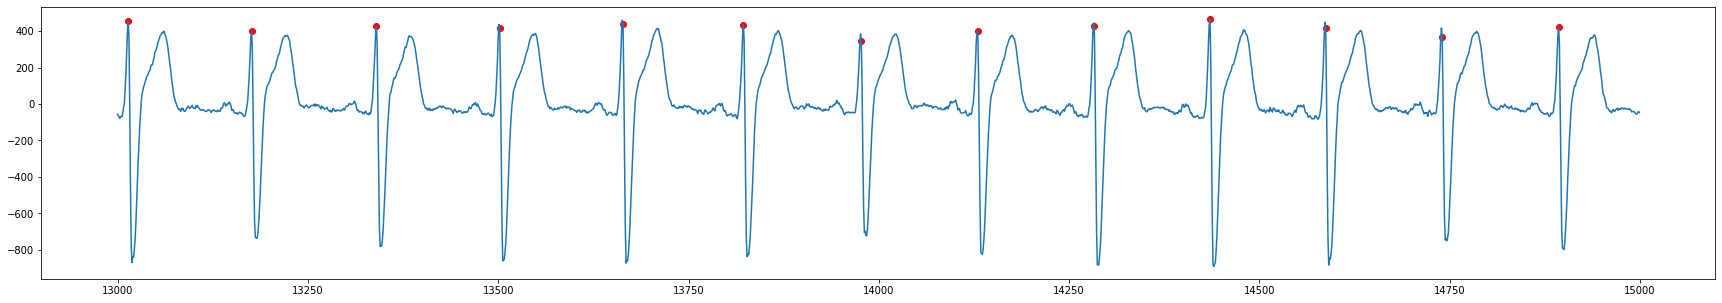

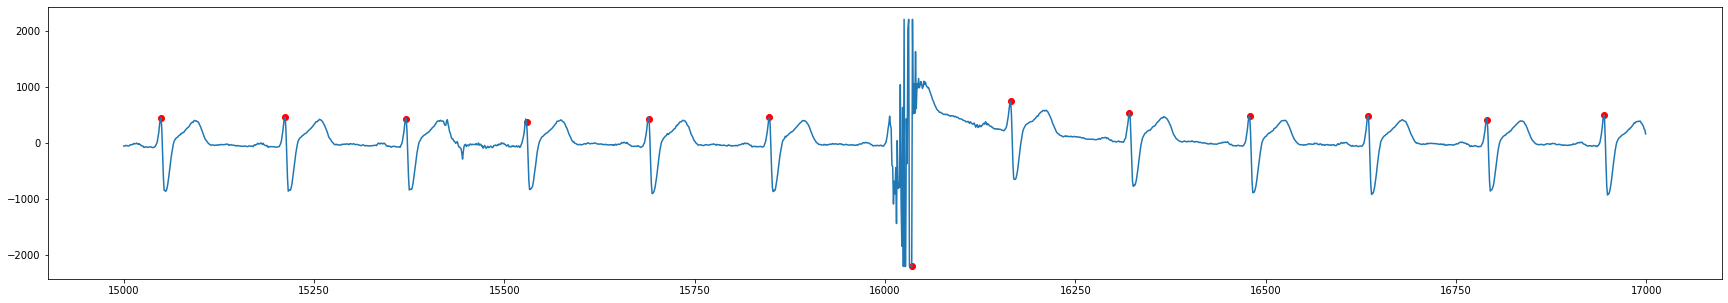

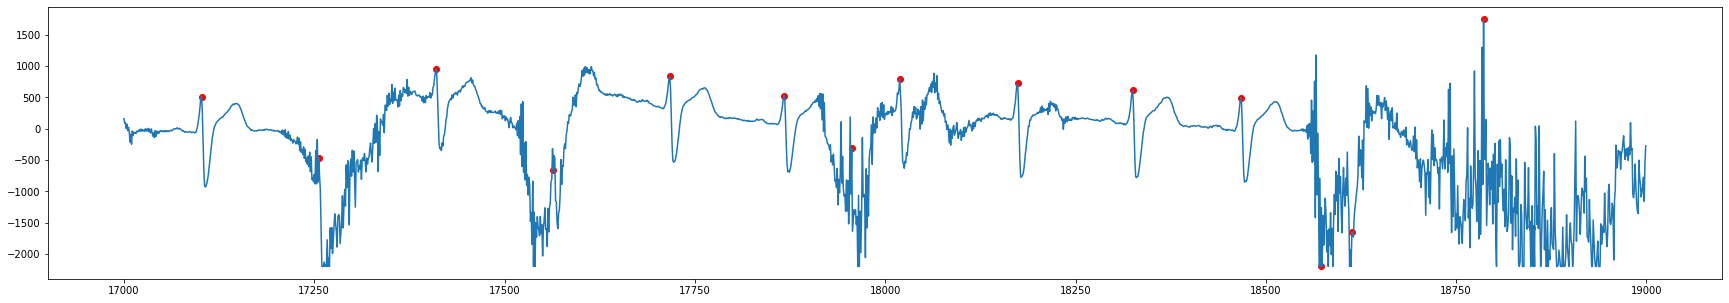

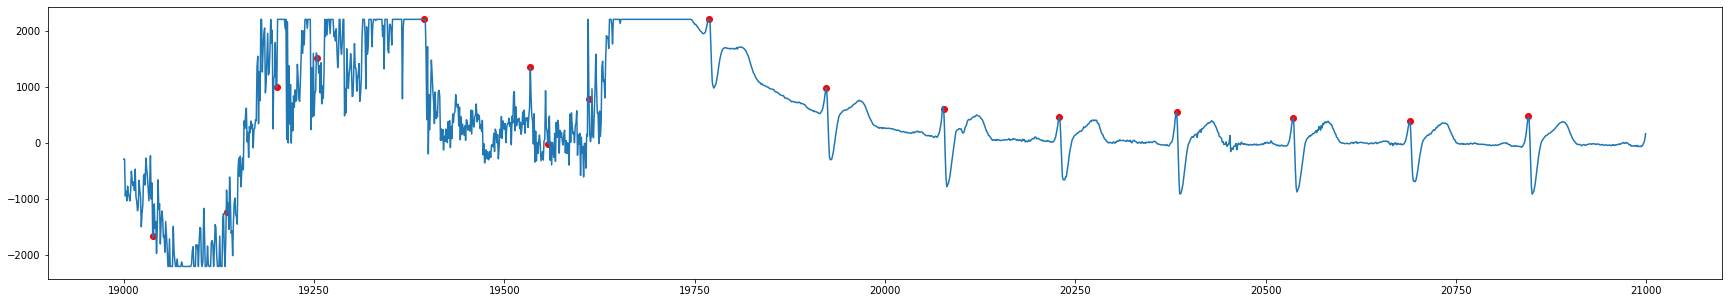

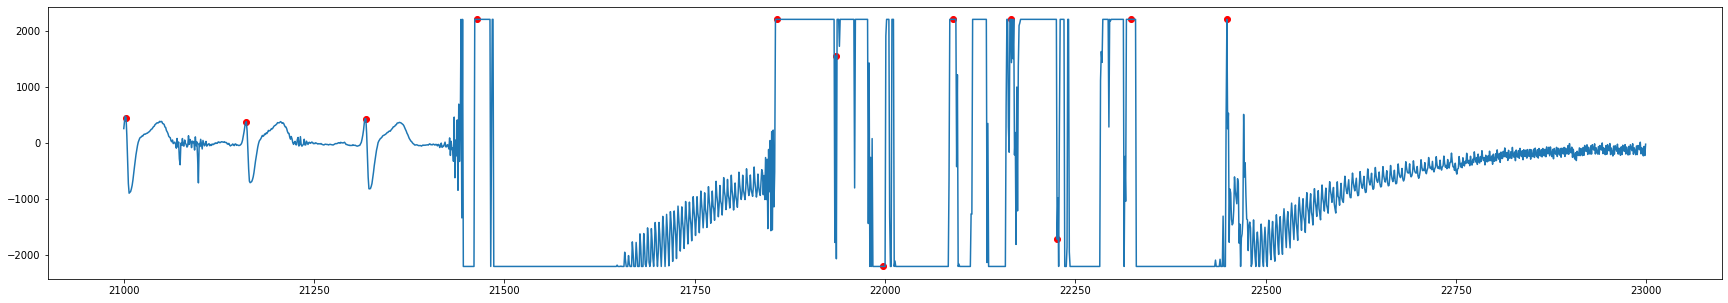

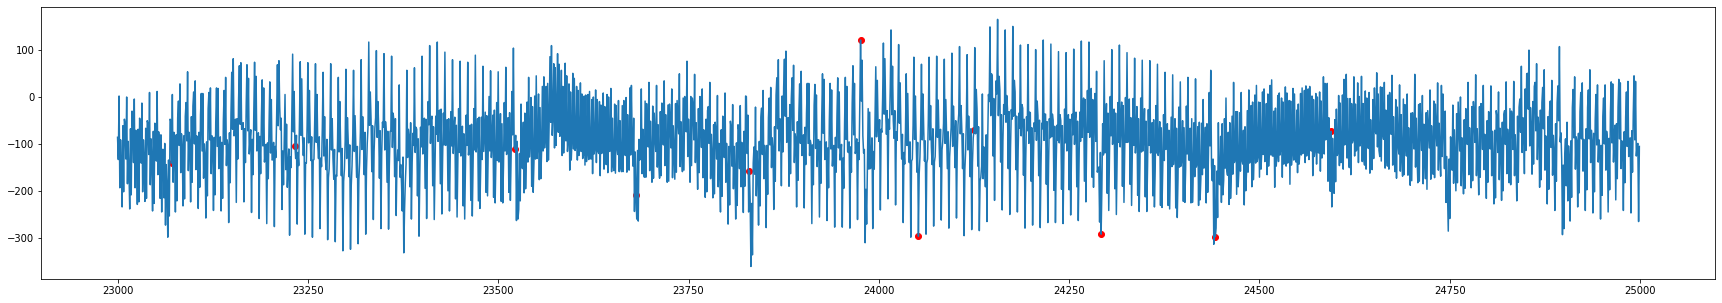

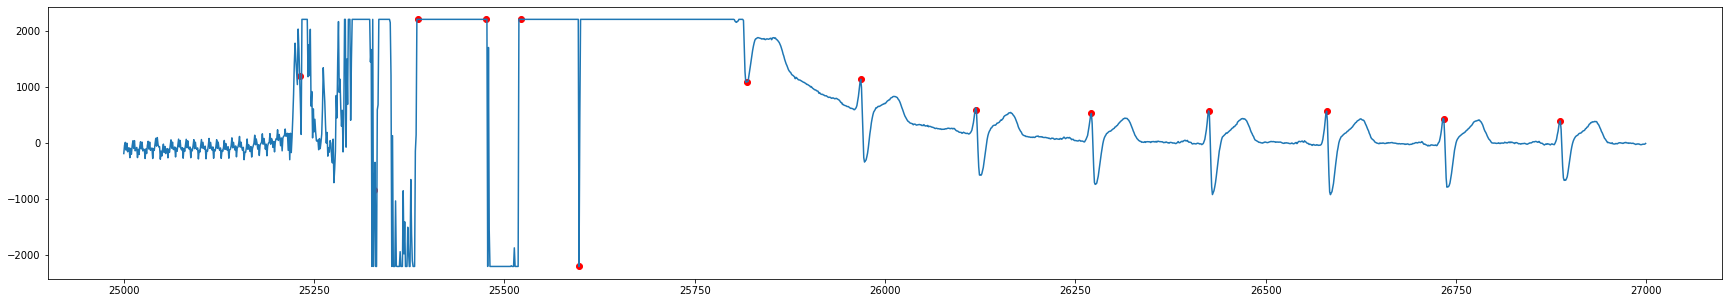

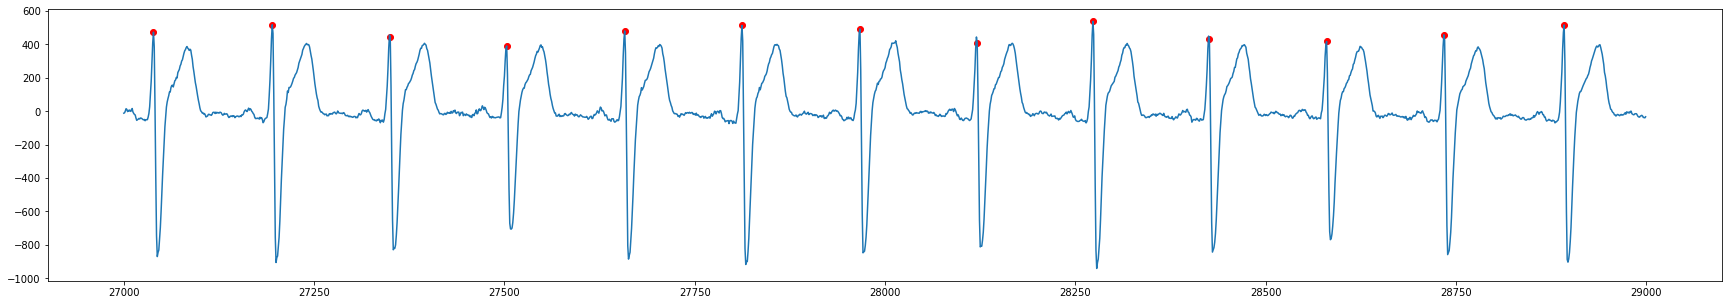

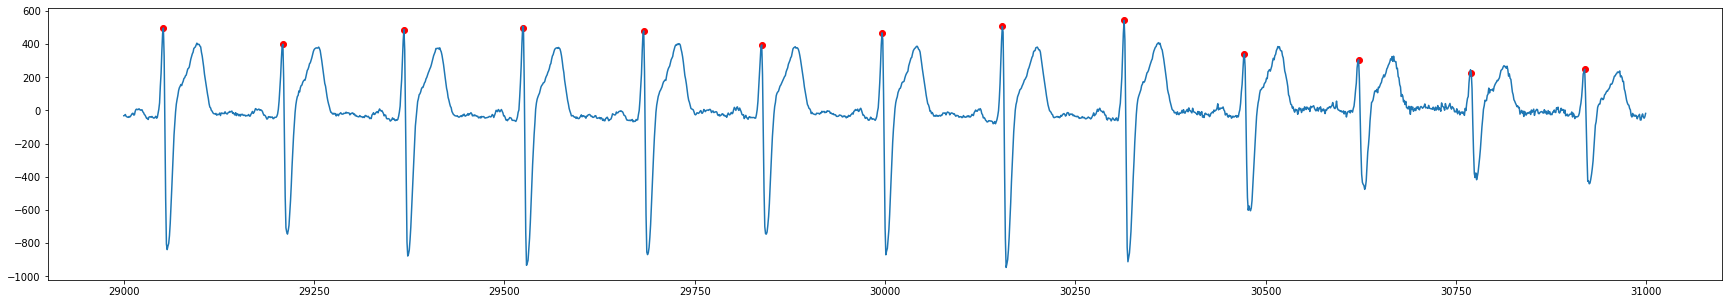

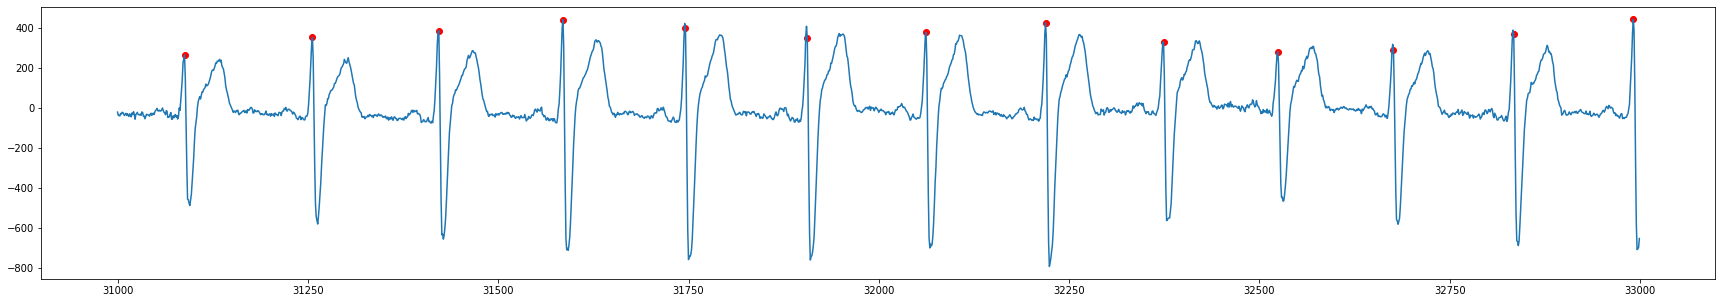

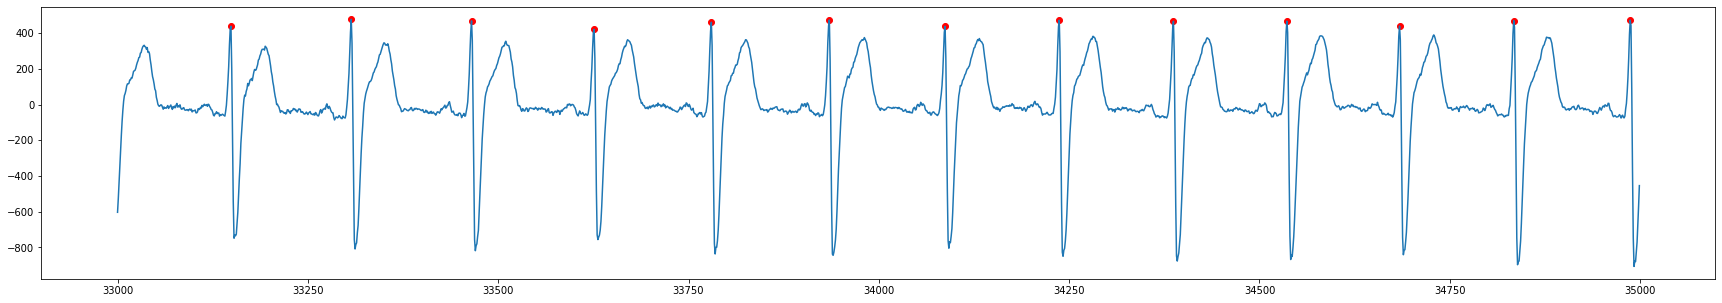

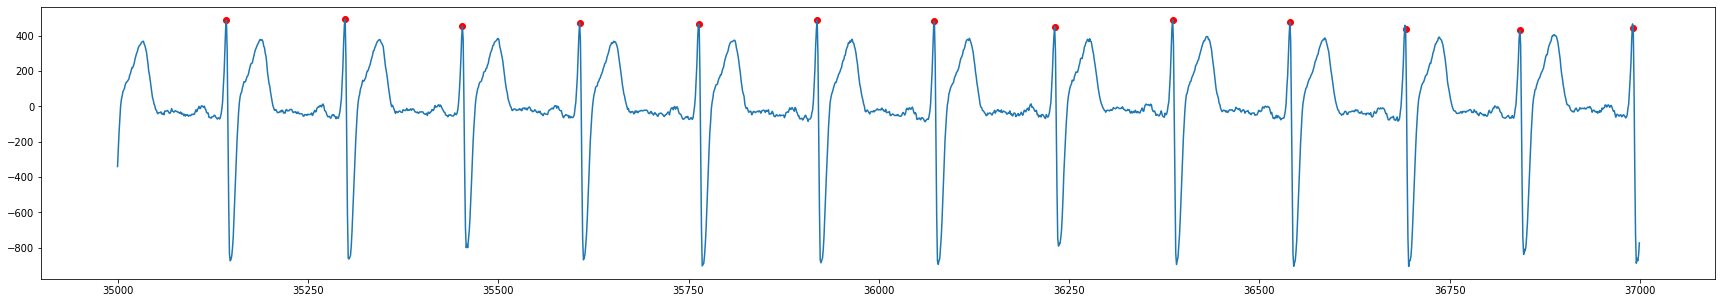

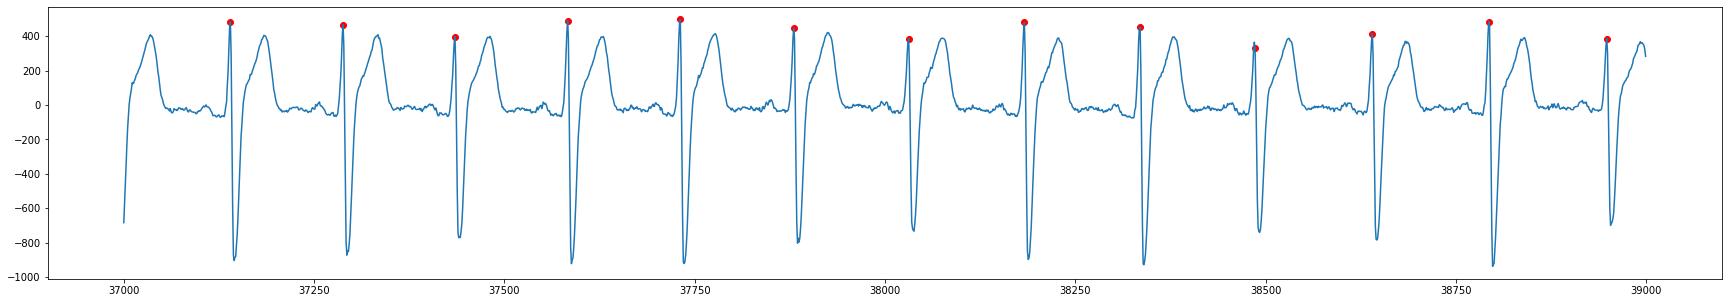

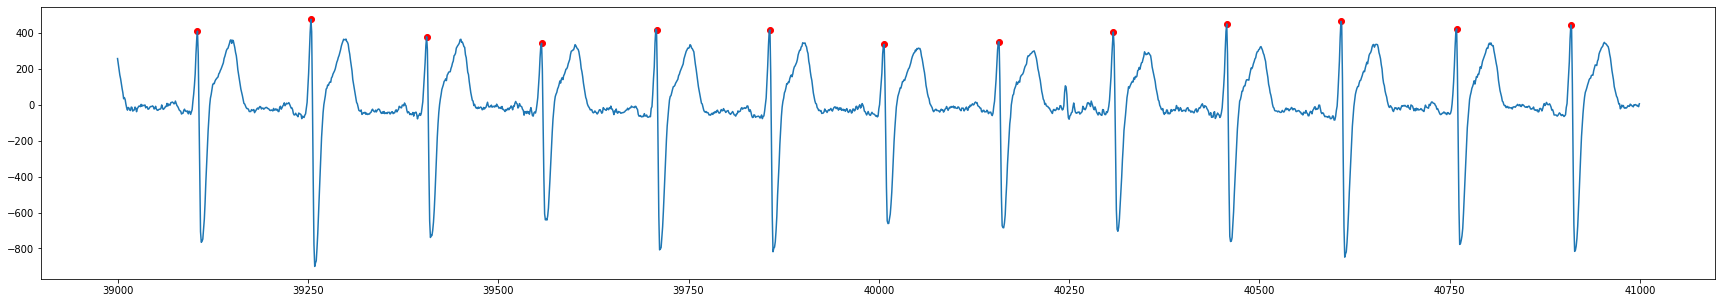

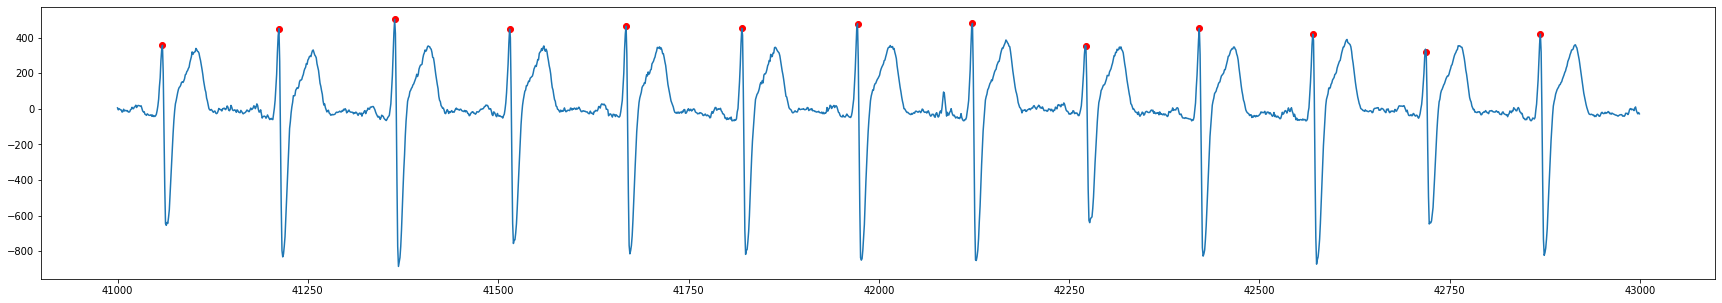

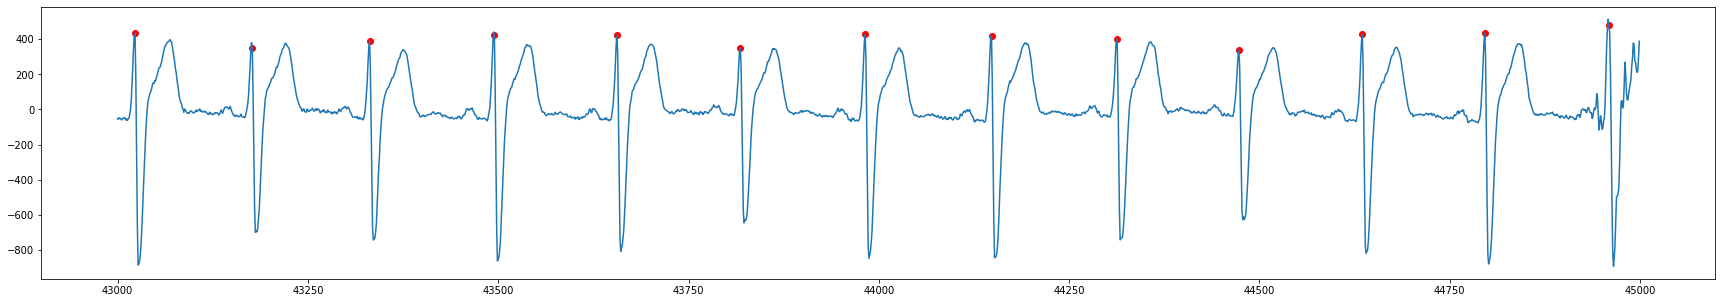

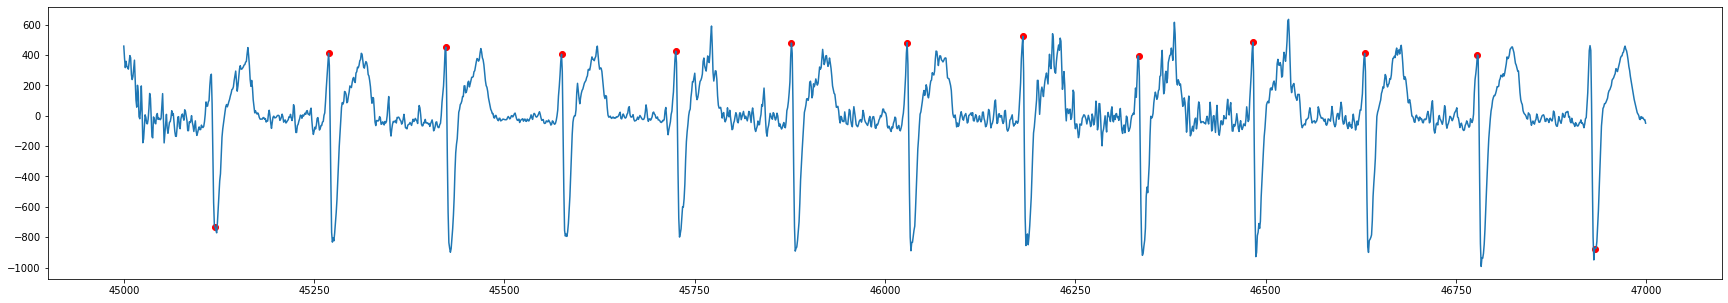

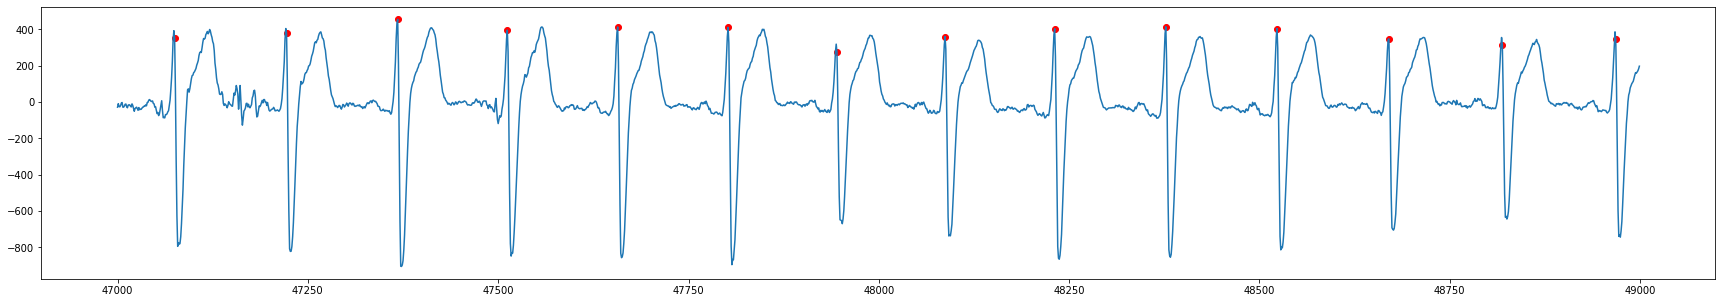

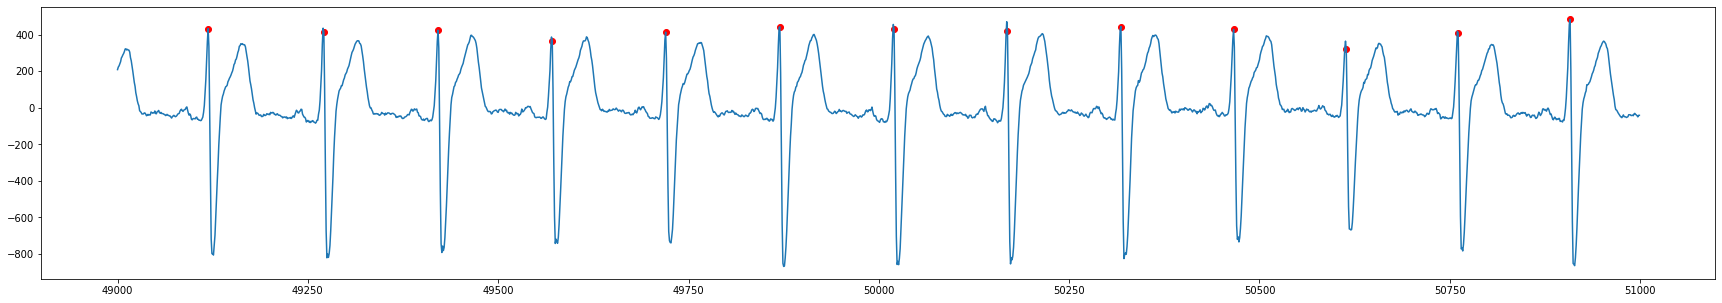

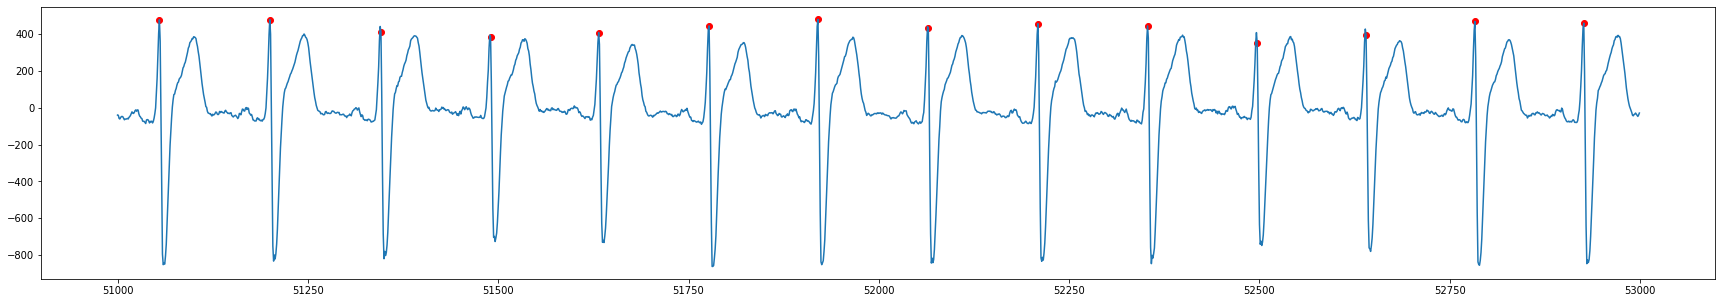

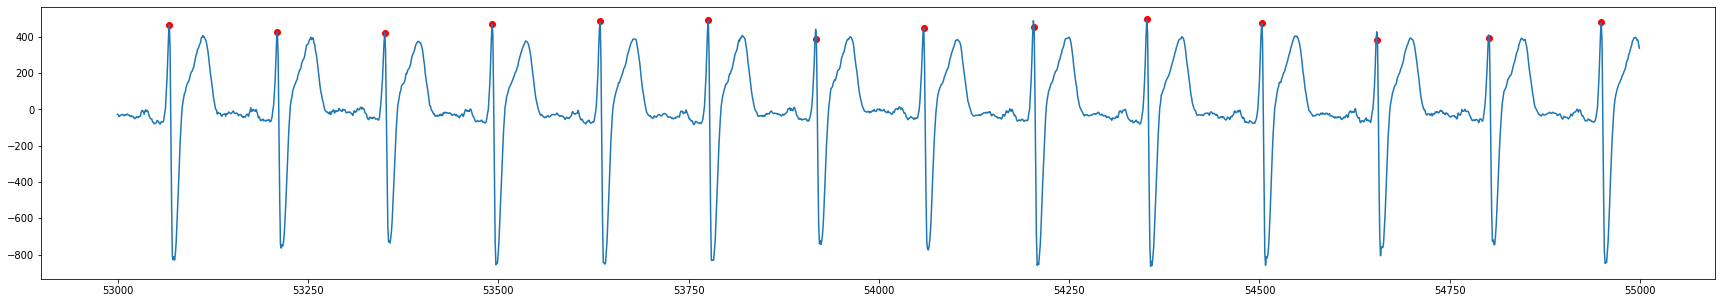

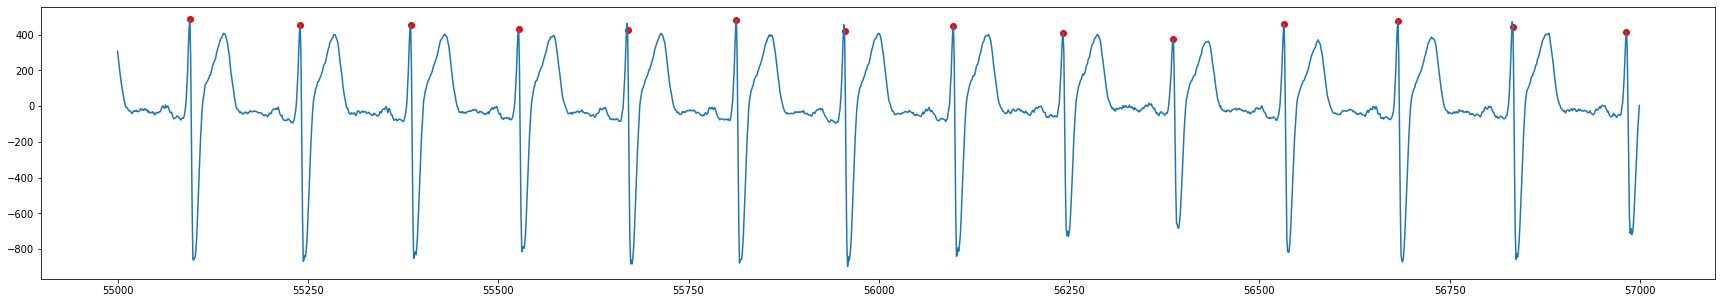

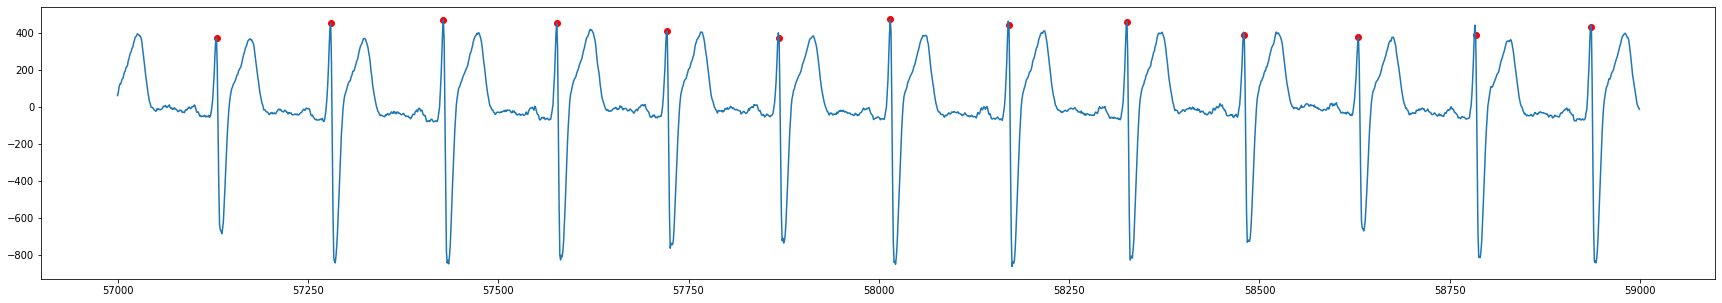

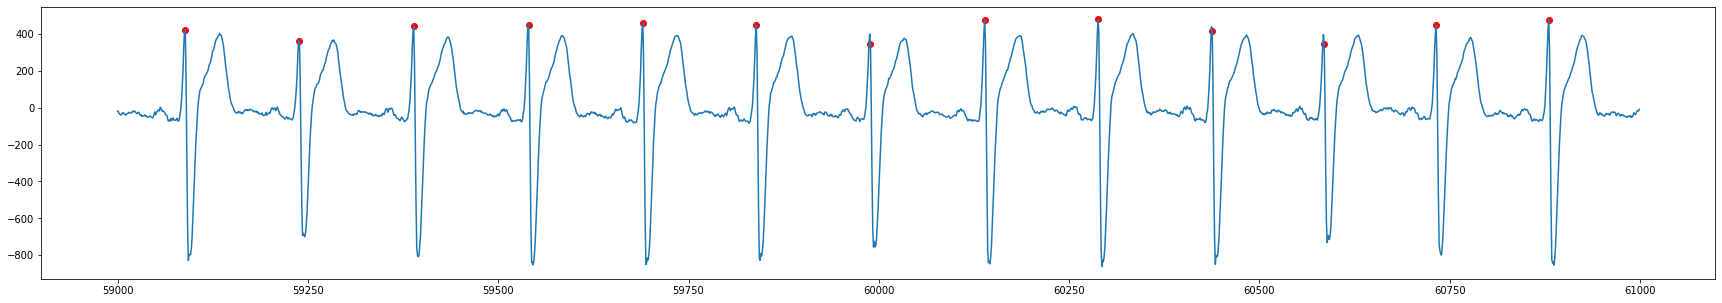

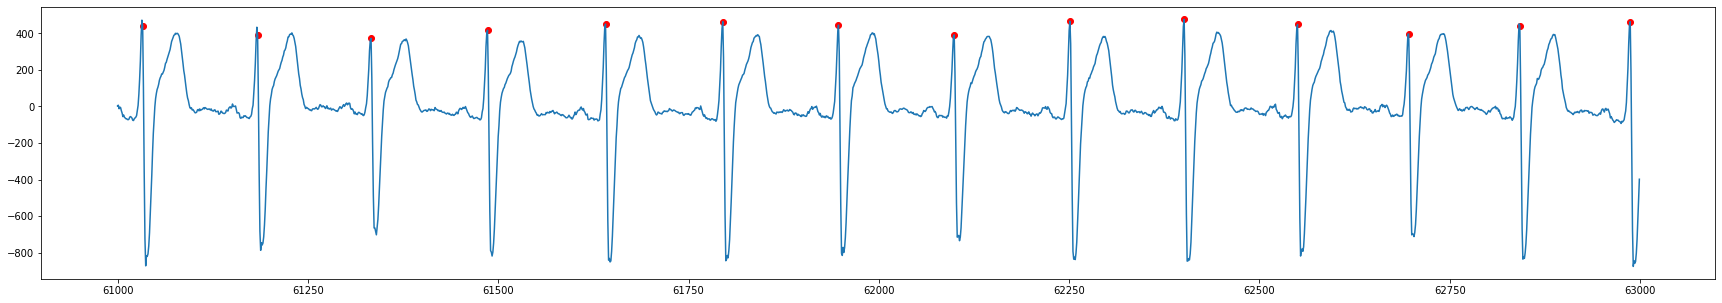

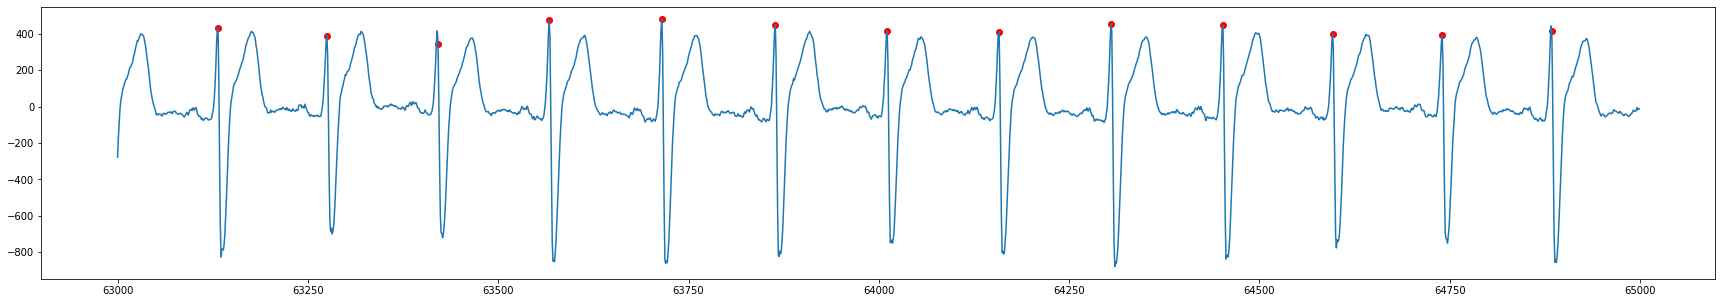

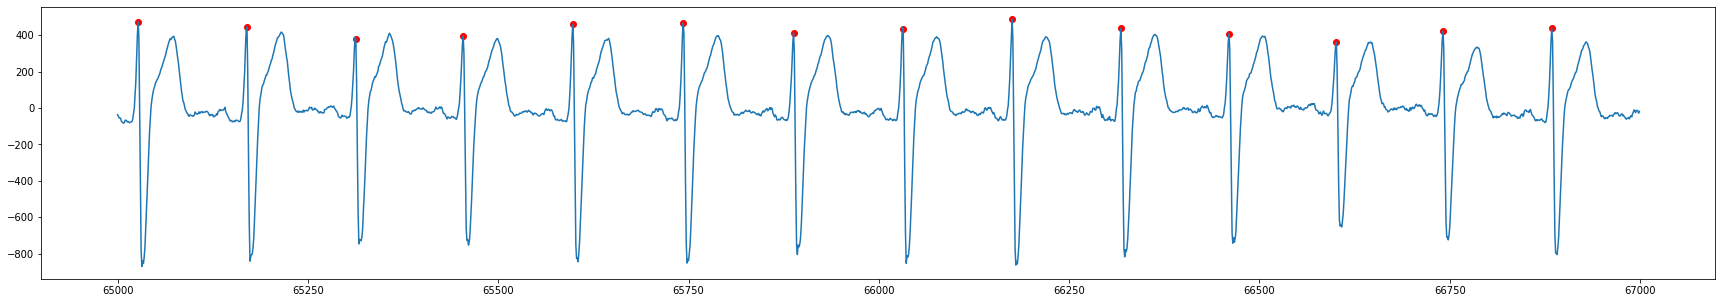

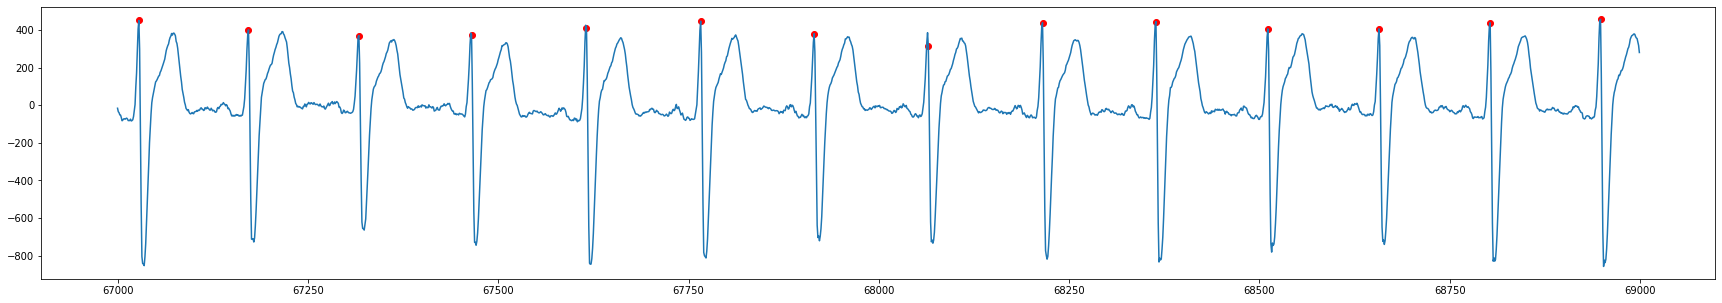

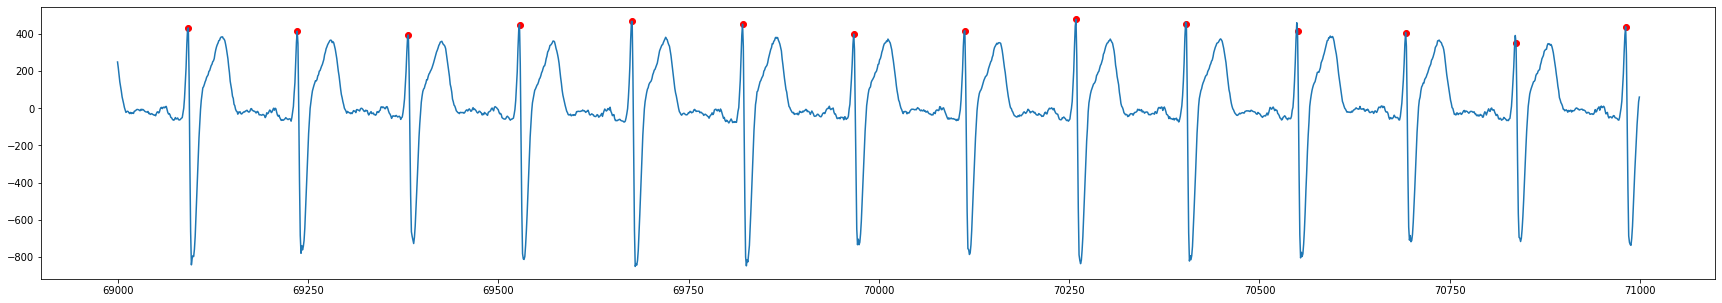

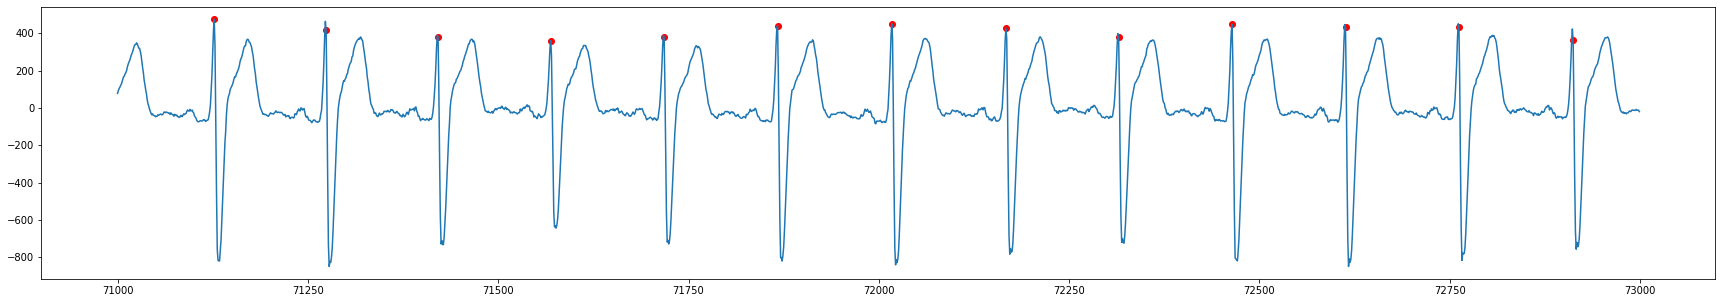

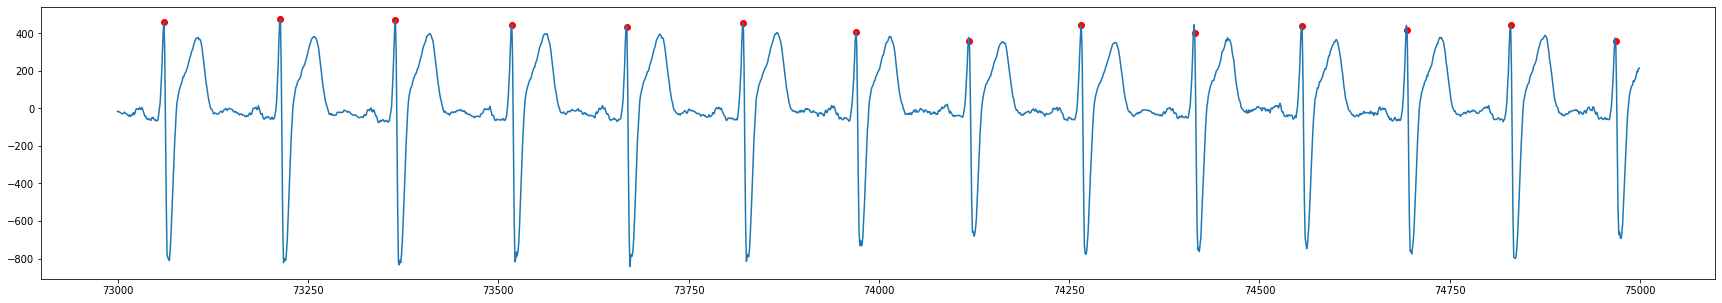

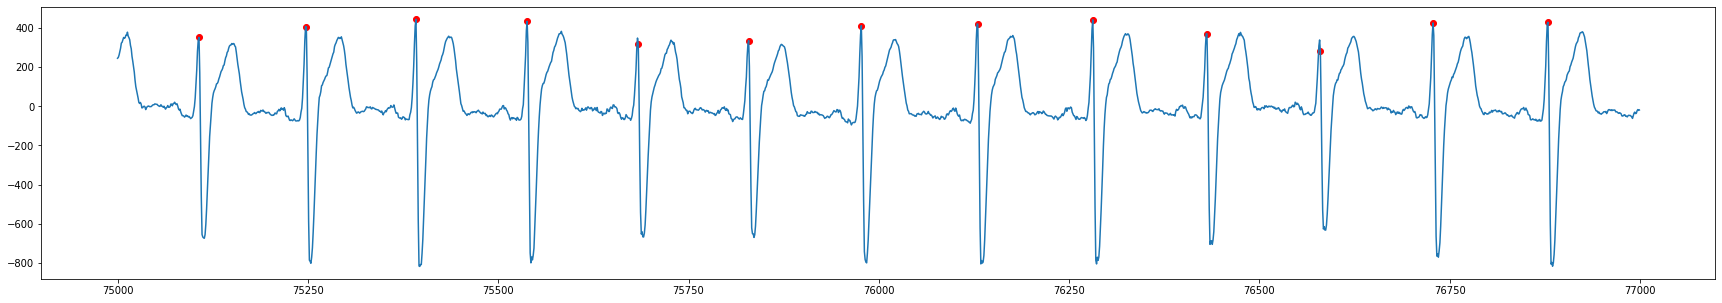

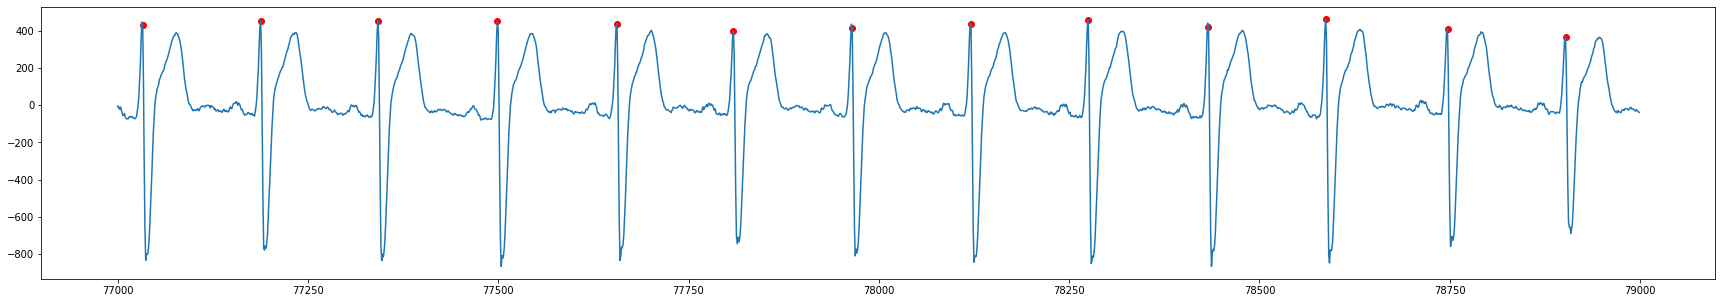

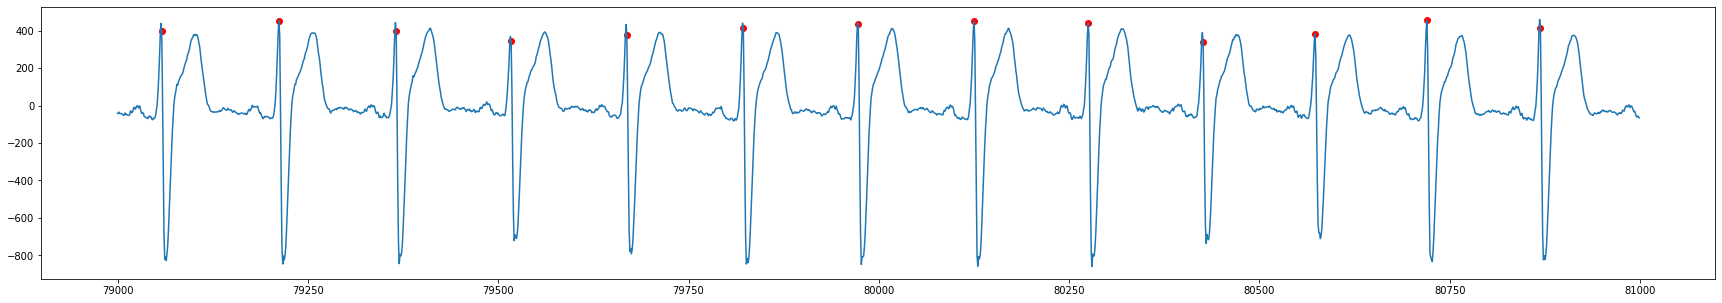

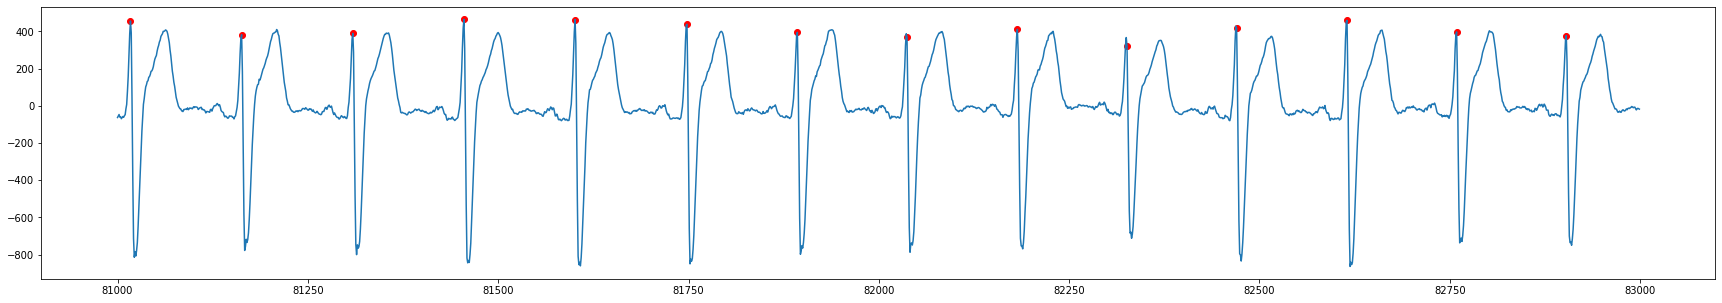

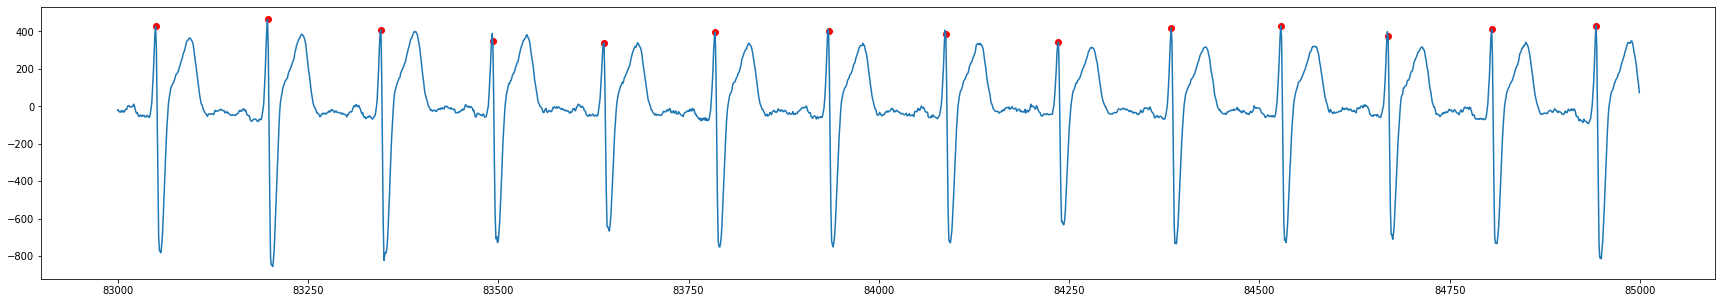

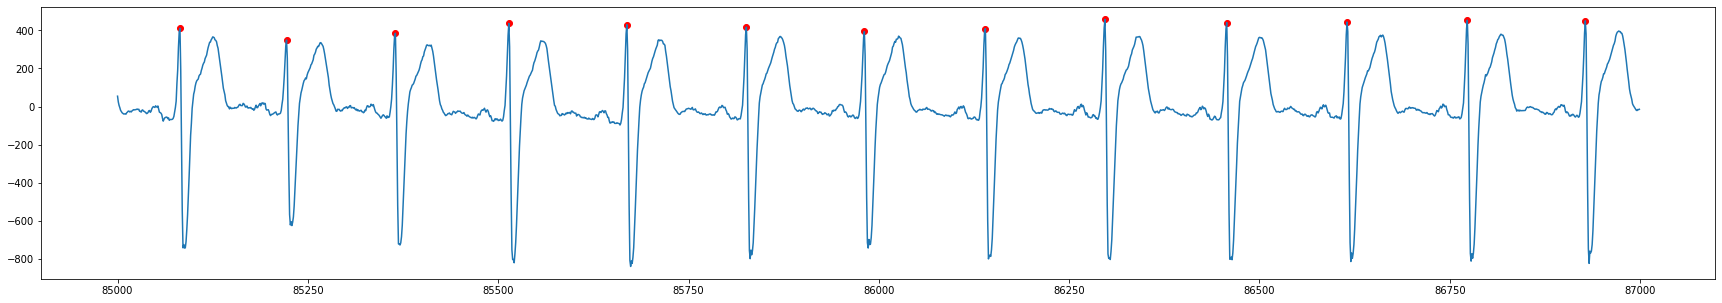

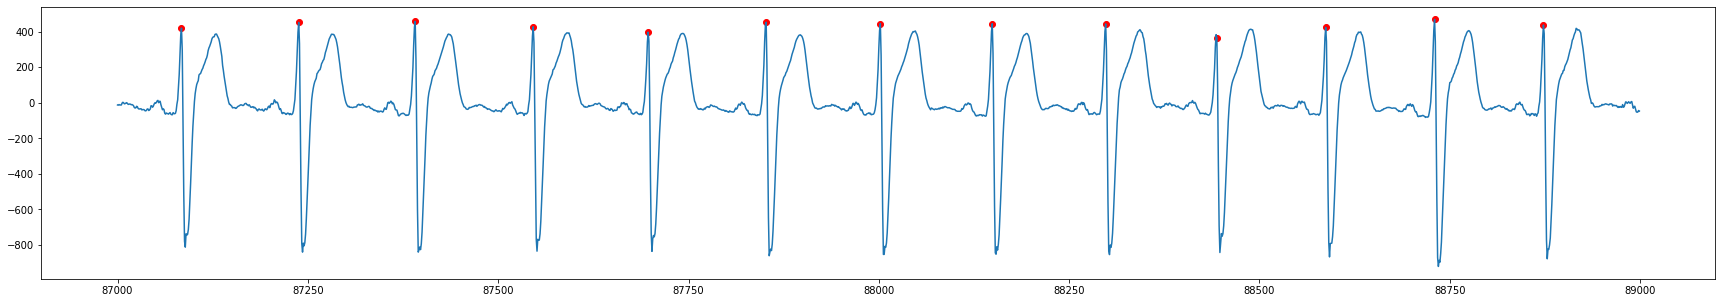

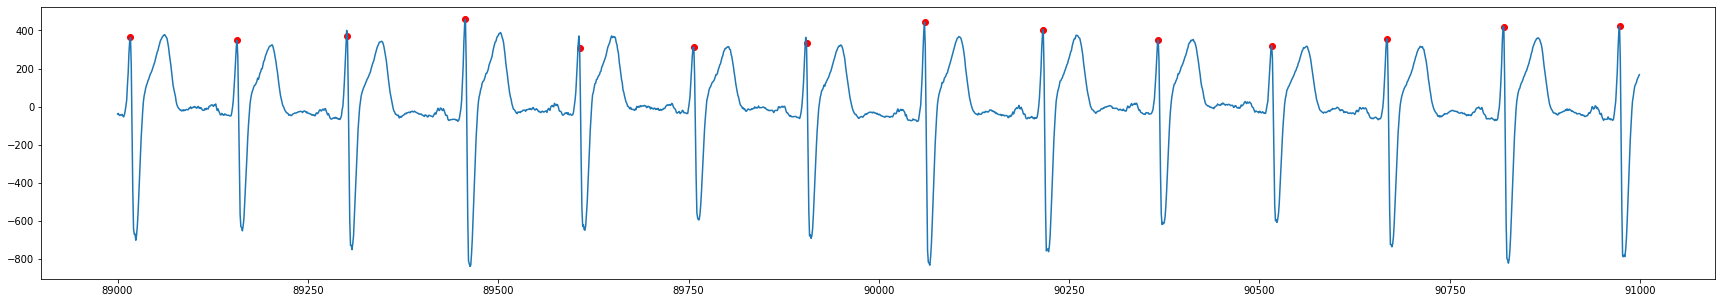

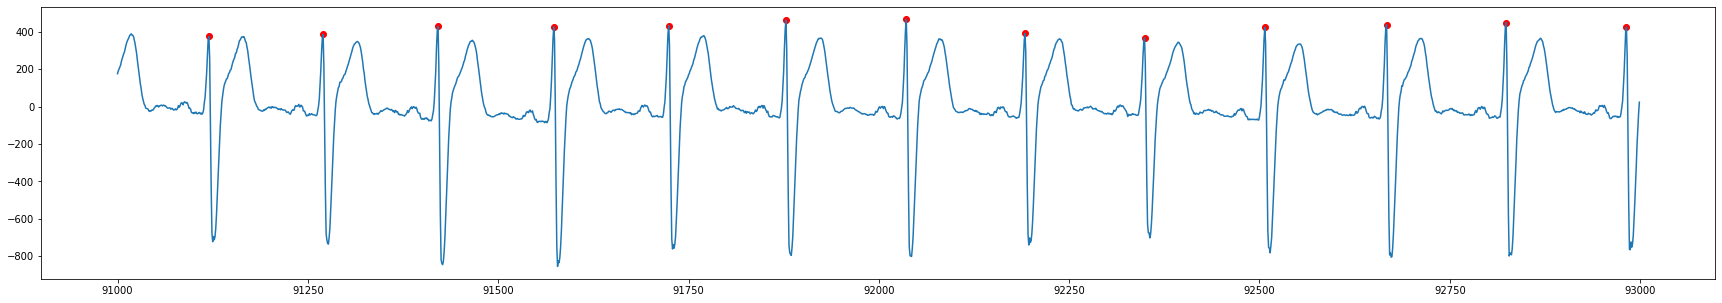

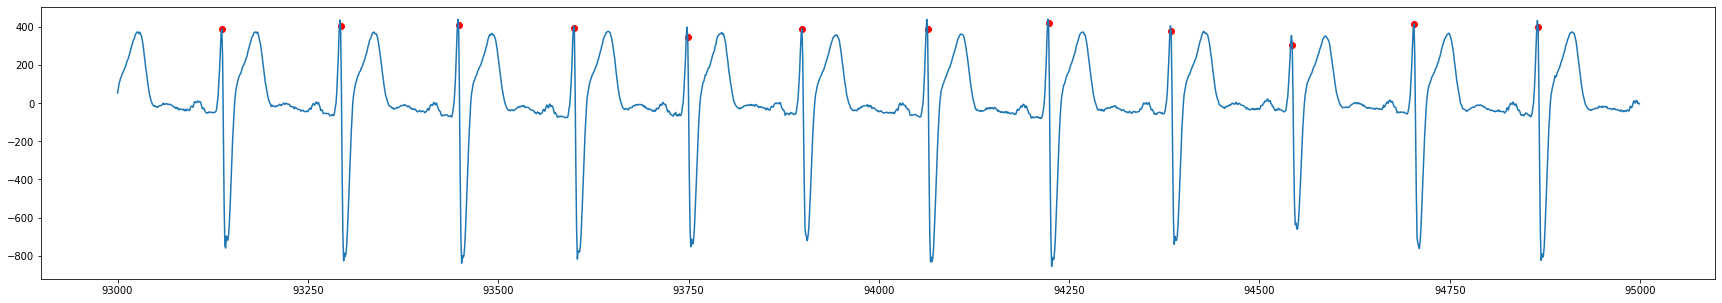

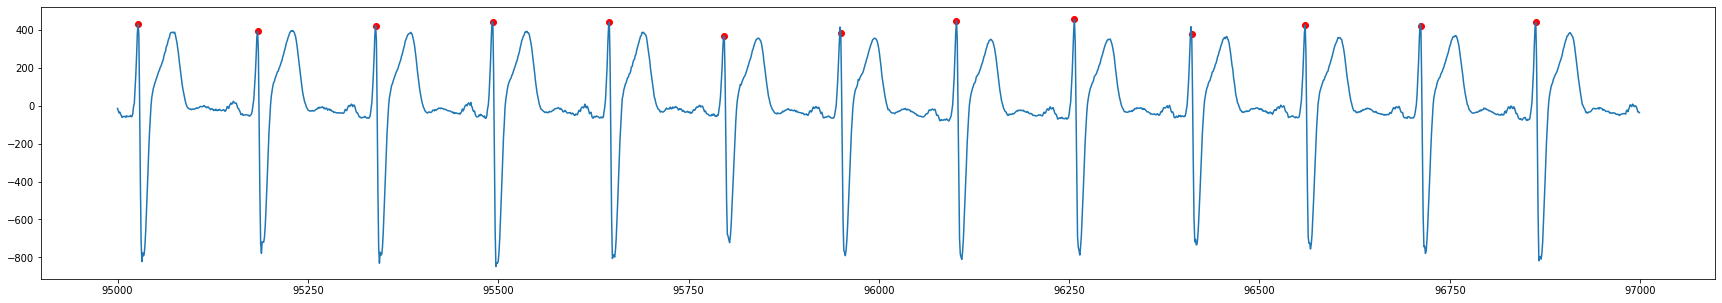

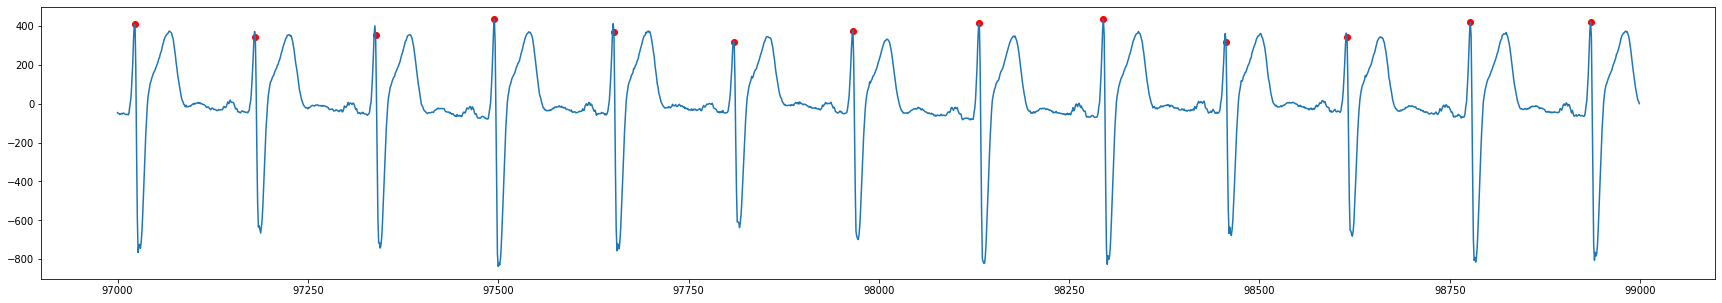

In [4]:
k = [n for n in range(5000, 100001, 2000)]

for start, end in zip(k[:-1], k[1:]):
    si = bisect.bisect_left(R, start)
    ei = bisect.bisect_left(R, end)

    # Peak label
    x = R[si:ei].astype(int)
    y = ecg[x]

    plt.figure(figsize=(30,5))
    plt.scatter(x, y, c='r')
    plt.plot([n for n in range(start, end)],  ecg[start:end])
    plt.show()